In this Notebook I share the code scripts I used for the several sub-tasks required for the file preprocessing.

# Adding noise

In [2]:
import numpy as np
import math
import librosa
import soundfile as sf
import random
import matplotlib.pyplot as plt

In [3]:
def calculate_constant(signal: np.array, noise: np.array, target_snr: float):
    snr = 10 ** (target_snr/10)
    print('signal to noise ratio', snr)
    e_s = np.mean(np.square(signal))
    e_n = np.mean(np.square(noise))
    c = math.sqrt((e_s/(snr*e_n)))
    print('constant', c)
    return c

def normalize_new_signal(new_signal: np.array):
    print('new signal', new_signal)
    max_db = new_signal.max()
    print('max', max_db)
    min_db = new_signal.min()
    print('min', min_db)
    if max_db >= 1 or min_db <= -1:
        abs_val = max([abs(max_db), abs(min_db)])
        print(f'Divide signal by {abs_val}')
        new_signal = new_signal / abs_val
    else:
        print('No changes made to the signal')
    return new_signal

def add_noise(signal: np.array, noise: np.array, target_snr: float):
    c = calculate_constant(signal, noise, target_snr)
    new_signal = signal + np.dot(c, noise)
    fixed_signal = normalize_new_signal(new_signal)
    return fixed_signal

In [4]:
signal, sr = librosa.load("C:/Users/kleop/Documents/repos/Exercises/ASR_assignment/random file/174-168635-0012.wav", sr=16000)
noise, sr_noise = librosa.load("C:/Users/kleop/Documents/repos/Exercises/ASR_assignment/noise/OMEETING/ch07.wav", sr=16000)

sound_length = len(signal)
noise_length = len(noise)
# Calculate the maximum possible starting point for the noise file
max_start = noise_length - sound_length
# Generate a random starting point within the noise file
start = random.randint(0, max_start)
 # Calculate the corresponding end point for the noise file
end = start + sound_length
# Extract the corresponding portion of the noise file
extracted_noise = noise[start:end]

In [5]:
new_signal_0_3 = add_noise(signal, extracted_noise, 3)
new_signal_0_6 = add_noise(signal, extracted_noise, 6)
new_signal_0_9 = add_noise(signal, extracted_noise, 9)

signal to noise ratio 1.9952623149688795
constant 12.054701582750562
new signal [ 0.02728752  0.02265933  0.01913478 ... -0.0287557  -0.03770857
 -0.04485088]
max 0.42183092049800985
min -0.47388751939139473
No changes made to the signal
signal to noise ratio 3.9810717055349722
constant 8.534075167517056
new signal [ 0.019122    0.01578311  0.01322553 ... -0.0203753  -0.02664214
 -0.03174308]
max 0.41484725603908107
min -0.33571840409628095
No changes made to the signal
signal to noise ratio 7.943282347242816
constant 6.041662538461054
new signal [ 0.01334126  0.01091511  0.0090421  ... -0.01444243 -0.01880772
 -0.02246347]
max 0.4099032002258291
min -0.33579254377159734
No changes made to the signal


In [6]:
 # Write the noisy sound data to a new file
sf.write("C:/Users/kleop/Documents/repos/Exercises/ASR_assignment/random file/new_signal_0_9.wav", new_signal_0_9, sr)
sf.write("C:/Users/kleop/Documents/repos/Exercises/ASR_assignment/random file/new_signal_0_6.wav", new_signal_0_6, sr)
sf.write("C:/Users/kleop/Documents/repos/Exercises/ASR_assignment/random file/new_signal_0_3.wav", new_signal_0_3, sr)

# Plot spectograms before and after adding noise

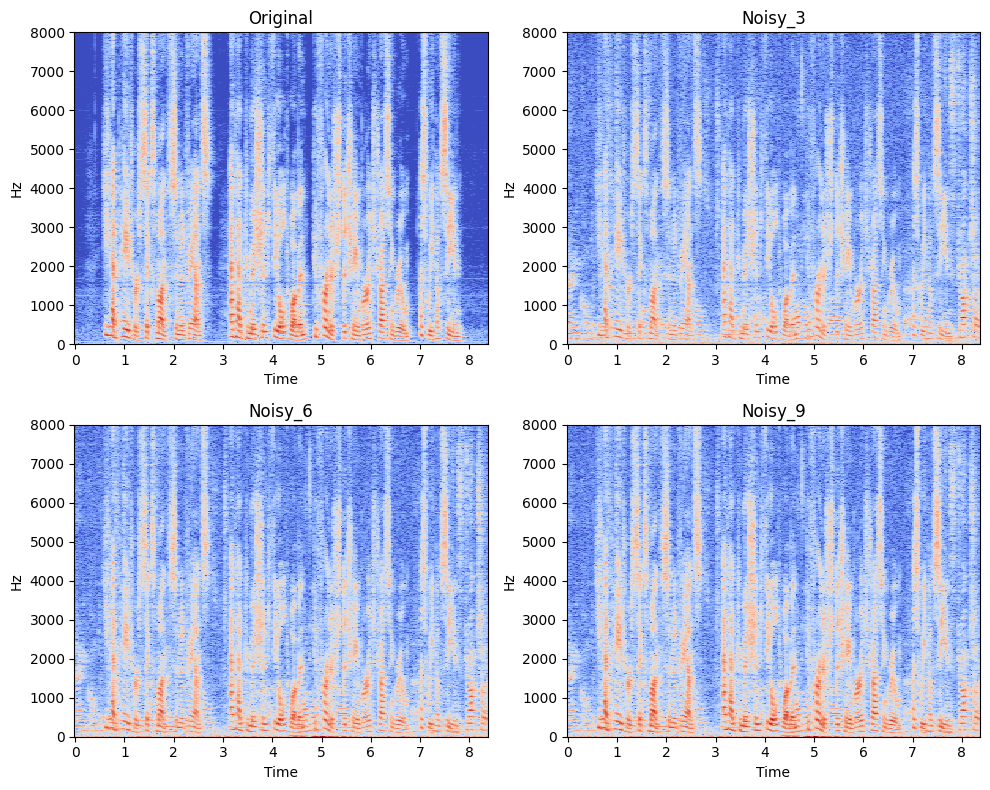

In [7]:
X = librosa.stft(signal)
Xdb = librosa.amplitude_to_db(abs(X))
X_noise_3 = librosa.stft(new_signal_0_3)
Xdb_3 = librosa.amplitude_to_db(abs(X_noise_3))
X_noise_6 = librosa.stft(new_signal_0_6)
Xdb_6 = librosa.amplitude_to_db(abs(X_noise_6))
X_noise_9 = librosa.stft(new_signal_0_9)
Xdb_9 = librosa.amplitude_to_db(abs(X_noise_9))

# Create a figure with four subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz', ax=axes[0, 0])
axes[0, 0].set_title('Original')

librosa.display.specshow(Xdb_3,sr=sr, x_axis='time', y_axis='hz' , ax=axes[0, 1])
axes[0, 1].set_title('Noisy_3')

librosa.display.specshow(Xdb_6,sr=sr, x_axis='time', y_axis='hz', ax=axes[1, 0])
axes[1, 0].set_title('Noisy_6')

librosa.display.specshow(Xdb_9,sr=sr, x_axis='time', y_axis='hz', ax=axes[1, 1])
axes[1, 1].set_title('Noisy_9')

# Adjust spacing between subplots
fig.tight_layout()

# Display the figure
plt.show()


# Comments

Original sentence: We observe a well-defined and concentrated energy at specific frequencies (up to 1000-1500 Hz), corresponding to the speech sounds present in the sentence. This gives us the view of sharp and clearly distinguishable peaks and lines in the spectrogram. We also observe specific time intervals, where there is no or very low energy compared to the entire spectogram. These intervals represent the silence i.e the absence of speech activity.

Noisy sentences(SNR:3,6,9 dB):Comparing the orginal sentence, with the noisy ones we previously generated, what we first notice is that the energy of the noise interferes with the energy of the original sentence, leading to a spectogram filled with energy throughout the whole duration of the file.That means there are no moments of silence, while the background noise is also obscuring the original speech patterns and making it harder to identify specific speech sounds or features of the original sentence. Nevertheless, there is an interesting evolution in the spectograms of the noisy files, which is worth mentioning. The noisy file with SNR of 9dB seems to be resembling the original file quite a lot, and it seems to be maintaining the original speech patterns, but with some additional diffuse energy due to the noise. This happens, because as we increace the value of SNR, we give more power on the desired signal relative to the power of the background noise. So with a higher SNR,the background noise gets weaker. This gives us also an intuition about the evolution of the Word Error Rate results of the noisy files, i.e we  expect the noise file with SNR 9dB to be having a lower mean WER compared to the other two noisy files(3 and 6 dB).